## 1. Setup and Data Loading

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('Set2')

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


In [2]:
# Load datasets
print("Loading datasets...")

train_transaction = pd.read_csv('../data/train_transaction.csv')
train_identity = pd.read_csv('../data/train_identity.csv')
test_transaction = pd.read_csv('../data/test_transaction.csv')
test_identity = pd.read_csv('../data/test_identity.csv')

print("✓ All datasets loaded successfully")

Loading datasets...
✓ All datasets loaded successfully
✓ All datasets loaded successfully


## 2. Dataset Shapes and Structure

In [3]:
# Display dataset shapes
print("="*60)
print("DATASET SHAPES")
print("="*60)
print(f"\nTrain Transaction: {train_transaction.shape}")
print(f"Train Identity:    {train_identity.shape}")
print(f"Test Transaction:  {test_transaction.shape}")
print(f"Test Identity:     {test_identity.shape}")

print(f"\n{'='*60}")
print("KEY INSIGHTS")
print("="*60)
print(f"Total training samples: {train_transaction.shape[0]:,}")
print(f"Total test samples:     {test_transaction.shape[0]:,}")
print(f"Transaction features:   {train_transaction.shape[1]}")
print(f"Identity features:      {train_identity.shape[1]}")
print(f"\nIdentity coverage (train): {train_identity.shape[0]/train_transaction.shape[0]*100:.1f}%")
print(f"Identity coverage (test):  {test_identity.shape[0]/test_transaction.shape[0]*100:.1f}%")

DATASET SHAPES

Train Transaction: (590540, 394)
Train Identity:    (144233, 41)
Test Transaction:  (506691, 393)
Test Identity:     (141907, 41)

KEY INSIGHTS
Total training samples: 590,540
Total test samples:     506,691
Transaction features:   394
Identity features:      41

Identity coverage (train): 24.4%
Identity coverage (test):  28.0%


## 3. Target Variable Analysis

TARGET DISTRIBUTION (isFraud)

Legitimate (0): 569,877 (96.50%)
Fraud (1):      20,663 (3.50%)

Class Imbalance Ratio: 1:27.6


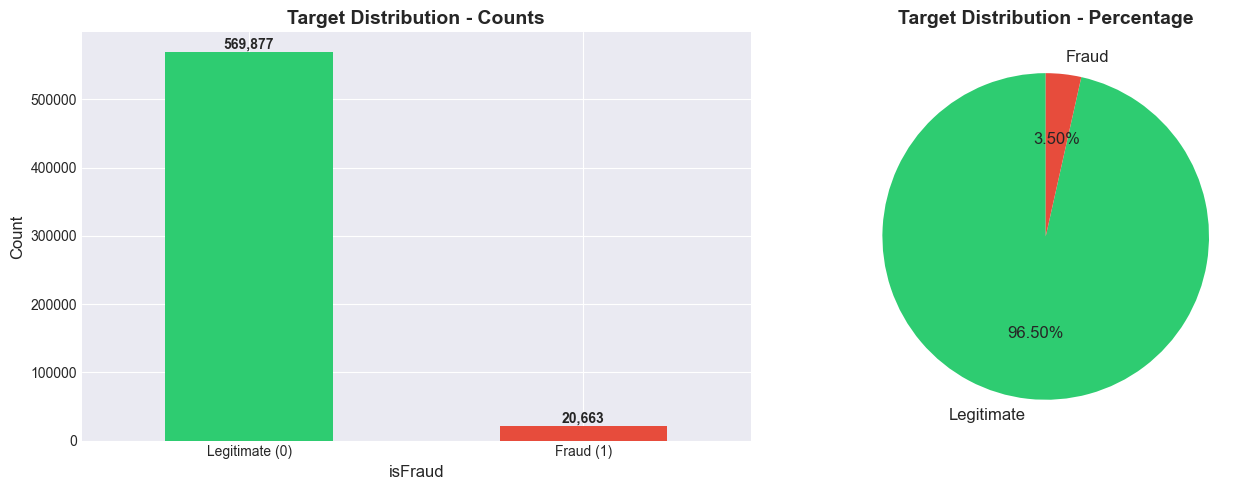


⚠️  Highly imbalanced dataset! Fraud rate: 3.50%


In [4]:
# Analyze target distribution
print("="*60)
print("TARGET DISTRIBUTION (isFraud)")
print("="*60)

fraud_counts = train_transaction['isFraud'].value_counts()
fraud_pct = train_transaction['isFraud'].value_counts(normalize=True) * 100

print(f"\nLegitimate (0): {fraud_counts[0]:,} ({fraud_pct[0]:.2f}%)")
print(f"Fraud (1):      {fraud_counts[1]:,} ({fraud_pct[1]:.2f}%)")
print(f"\nClass Imbalance Ratio: 1:{fraud_counts[0]/fraud_counts[1]:.1f}")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
ax1 = axes[0]
fraud_counts.plot(kind='bar', ax=ax1, color=['#2ecc71', '#e74c3c'])
ax1.set_title('Target Distribution - Counts', fontsize=14, fontweight='bold')
ax1.set_xlabel('isFraud', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.set_xticklabels(['Legitimate (0)', 'Fraud (1)'], rotation=0)
for i, v in enumerate(fraud_counts):
    ax1.text(i, v + 5000, f'{v:,}', ha='center', fontweight='bold')

# Pie chart
ax2 = axes[1]
ax2.pie(fraud_pct, labels=['Legitimate', 'Fraud'], autopct='%1.2f%%',
        colors=['#2ecc71', '#e74c3c'], startangle=90, textprops={'fontsize': 12})
ax2.set_title('Target Distribution - Percentage', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n⚠️  Highly imbalanced dataset! Fraud rate: {fraud_pct[1]:.2f}%")

## 4. Data Types Analysis

In [5]:
# Analyze data types
def analyze_dtypes(df, name):
    print(f"\n{'='*60}")
    print(f"{name.upper()} - DATA TYPES")
    print("="*60)
    
    dtype_counts = df.dtypes.value_counts()
    print(f"\nData type distribution:")
    for dtype, count in dtype_counts.items():
        print(f"  {dtype}: {count} columns")
    
    # Separate by type
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    
    print(f"\nNumeric columns:     {len(numeric_cols)}")
    print(f"Categorical columns: {len(categorical_cols)}")
    
    if len(categorical_cols) > 0:
        print(f"\nCategorical columns: {categorical_cols[:10]}..." if len(categorical_cols) > 10 else f"\nCategorical columns: {categorical_cols}")
    
    return numeric_cols, categorical_cols

# Analyze train transaction
train_trans_num, train_trans_cat = analyze_dtypes(train_transaction, 'Train Transaction')

# Analyze train identity
train_ident_num, train_ident_cat = analyze_dtypes(train_identity, 'Train Identity')


TRAIN TRANSACTION - DATA TYPES

Data type distribution:
  float64: 376 columns
  object: 14 columns
  int64: 4 columns

Numeric columns:     380
Categorical columns: 14

Categorical columns: ['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5']...

TRAIN IDENTITY - DATA TYPES

Data type distribution:
  float64: 23 columns
  object: 17 columns
  int64: 1 columns

Numeric columns:     24
Categorical columns: 17

Categorical columns: ['id_12', 'id_15', 'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33']...

Numeric columns:     380
Categorical columns: 14

Categorical columns: ['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5']...

TRAIN IDENTITY - DATA TYPES

Data type distribution:
  float64: 23 columns
  object: 17 columns
  int64: 1 columns

Numeric columns:     24
Categorical columns: 17

Categorical columns: ['id_12', 'id_15', 'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30

## 5. Missing Values Analysis


TRAIN TRANSACTION - MISSING VALUES

Columns with missing values: 374 / 394
Total missing cells: 95,566,686
Overall missingness: 41.07%

Top 20 columns with most missing values:
Column  Missing_Count  Missing_Pct
 dist2         552913    93.628374
    D7         551623    93.409930
   D13         528588    89.509263
   D14         528353    89.469469
   D12         525823    89.041047
    D6         517353    87.606767
    D9         515614    87.312290
    D8         515614    87.312290
  V157         508595    86.123717
  V163         508595    86.123717
  V162         508595    86.123717
  V161         508595    86.123717
  V158         508595    86.123717
  V153         508595    86.123717
  V138         508595    86.123717
  V155         508595    86.123717
  V154         508595    86.123717
  V149         508595    86.123717
  V148         508595    86.123717
  V147         508595    86.123717

Columns with missing values: 374 / 394
Total missing cells: 95,566,686
Overall missing

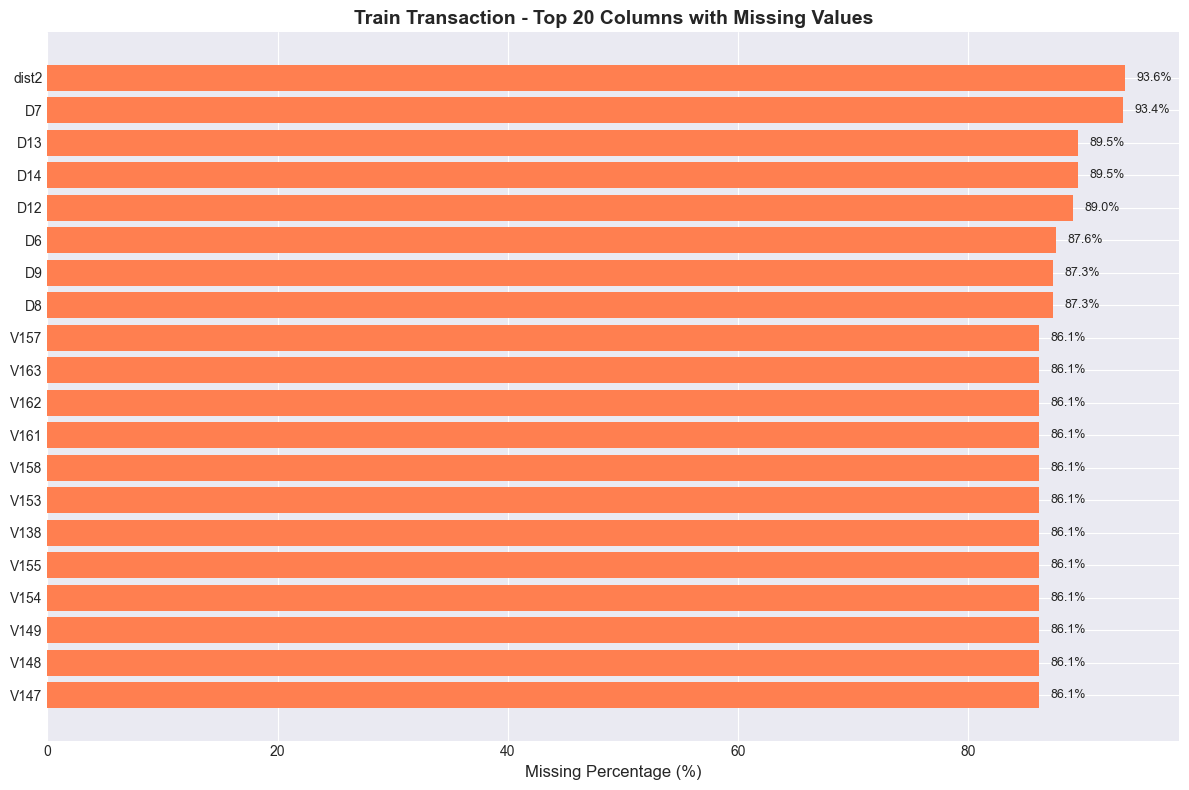


TRAIN IDENTITY - MISSING VALUES

Columns with missing values: 38 / 41
Total missing cells: 2,104,107
Overall missingness: 35.58%

Top 20 columns with most missing values:
    Column  Missing_Count  Missing_Pct
     id_24         139486    96.708798
     id_25         139101    96.441868
     id_07         139078    96.425922
     id_08         139078    96.425922
     id_21         139074    96.423149
     id_26         139070    96.420375
     id_27         139064    96.416215
     id_23         139064    96.416215
     id_22         139064    96.416215
     id_18          99120    68.722137
     id_03          77909    54.016071
     id_04          77909    54.016071
     id_33          70944    49.187079
     id_10          69307    48.052110
     id_09          69307    48.052110
     id_30          66668    46.222432
     id_32          66647    46.207872
     id_34          66428    46.056034
     id_14          64189    44.503685
DeviceInfo          25567    17.726179


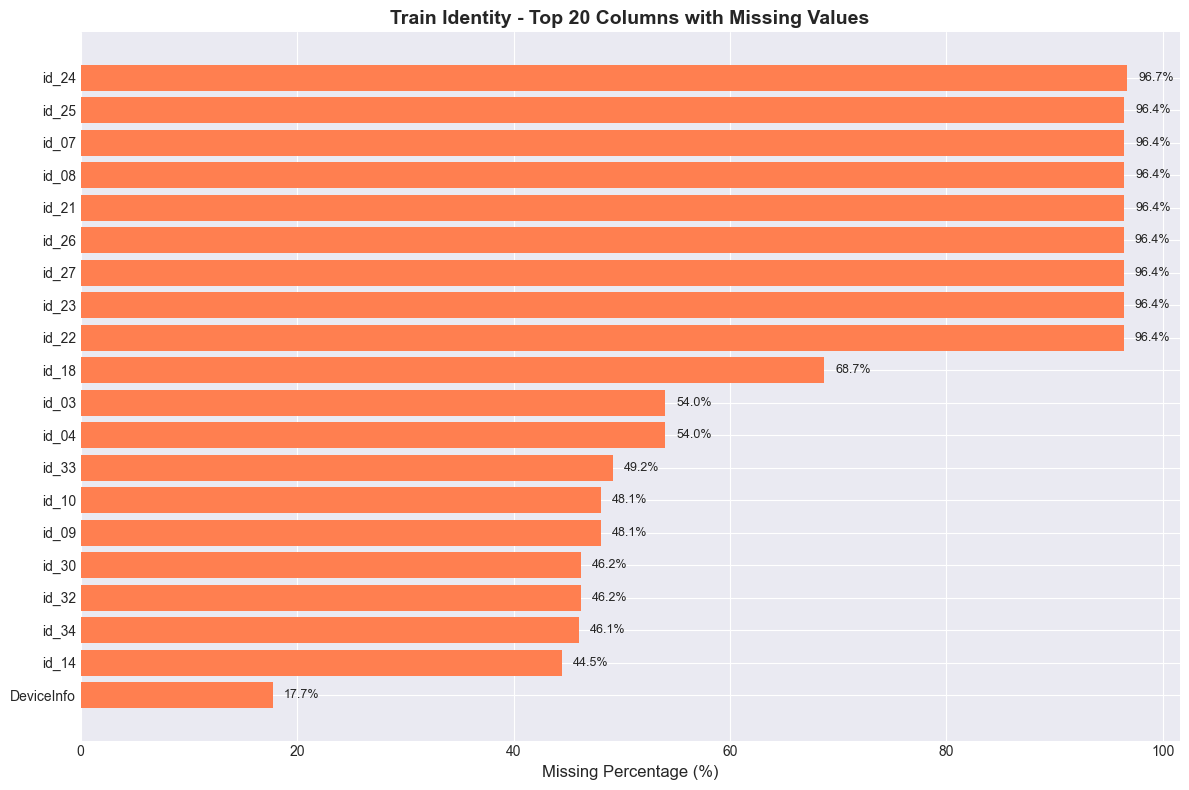

In [6]:
# Analyze missing values
def analyze_missing(df, name, top_n=20):
    print(f"\n{'='*60}")
    print(f"{name.upper()} - MISSING VALUES")
    print("="*60)
    
    missing_counts = df.isnull().sum()
    missing_pct = (missing_counts / len(df)) * 100
    
    missing_df = pd.DataFrame({
        'Column': missing_counts.index,
        'Missing_Count': missing_counts.values,
        'Missing_Pct': missing_pct.values
    })
    
    missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Pct', ascending=False)
    
    print(f"\nColumns with missing values: {len(missing_df)} / {len(df.columns)}")
    print(f"Total missing cells: {missing_df['Missing_Count'].sum():,}")
    print(f"Overall missingness: {missing_df['Missing_Count'].sum() / (len(df) * len(df.columns)) * 100:.2f}%")
    
    if len(missing_df) > 0:
        print(f"\nTop {top_n} columns with most missing values:")
        print(missing_df.head(top_n).to_string(index=False))
        
        # Visualize top missing columns
        fig, ax = plt.subplots(figsize=(12, 8))
        top_missing = missing_df.head(top_n)
        ax.barh(range(len(top_missing)), top_missing['Missing_Pct'], color='coral')
        ax.set_yticks(range(len(top_missing)))
        ax.set_yticklabels(top_missing['Column'])
        ax.set_xlabel('Missing Percentage (%)', fontsize=12)
        ax.set_title(f'{name} - Top {top_n} Columns with Missing Values', 
                     fontsize=14, fontweight='bold')
        ax.invert_yaxis()
        
        # Add percentage labels
        for i, v in enumerate(top_missing['Missing_Pct']):
            ax.text(v + 1, i, f'{v:.1f}%', va='center', fontsize=9)
        
        plt.tight_layout()
        plt.show()
    
    return missing_df

# Analyze missing values
train_trans_missing = analyze_missing(train_transaction, 'Train Transaction')
train_ident_missing = analyze_missing(train_identity, 'Train Identity')

## 6. Basic Statistics - Transaction Data

In [7]:
# Display basic statistics for key transaction columns
print("="*60)
print("TRANSACTION DATA - KEY STATISTICS")
print("="*60)

# Key columns to examine
key_cols = ['TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 
            'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2']

# Filter to existing columns
key_cols = [col for col in key_cols if col in train_transaction.columns]

print("\nNumeric columns:")
print(train_transaction[key_cols].select_dtypes(include=[np.number]).describe())

TRANSACTION DATA - KEY STATISTICS

Numeric columns:
       TransactionDT  TransactionAmt          card1          card2  \
count   5.905400e+05   590540.000000  590540.000000  581607.000000   
mean    7.372311e+06      135.027176    9898.734658     362.555488   
std     4.617224e+06      239.162522    4901.170153     157.793246   
min     8.640000e+04        0.251000    1000.000000     100.000000   
25%     3.027058e+06       43.321000    6019.000000     214.000000   
50%     7.306528e+06       68.769000    9678.000000     361.000000   
75%     1.124662e+07      125.000000   14184.000000     512.000000   
max     1.581113e+07    31937.391000   18396.000000     600.000000   

               card3          card5          addr1          addr2  \
count  588975.000000  586281.000000  524834.000000  524834.000000   
mean      153.194925     199.278897     290.733794      86.800630   
std        11.336444      41.244453     101.741072       2.690623   
min       100.000000     100.000000     1

In [8]:
# Categorical columns
print("\n" + "="*60)
print("CATEGORICAL FEATURES - UNIQUE VALUES")
print("="*60)

cat_cols = train_transaction.select_dtypes(include=['object']).columns.tolist()

if len(cat_cols) > 0:
    cat_summary = pd.DataFrame({
        'Column': cat_cols,
        'Unique_Values': [train_transaction[col].nunique() for col in cat_cols],
        'Missing_Pct': [train_transaction[col].isnull().sum() / len(train_transaction) * 100 for col in cat_cols]
    }).sort_values('Unique_Values', ascending=False)
    
    print("\n" + cat_summary.to_string(index=False))
    
    # Show examples of top categorical features
    print("\n" + "="*60)
    print("TOP CATEGORICAL FEATURES - VALUE COUNTS")
    print("="*60)
    
    for col in cat_cols[:5]:  # Show first 5 categorical columns
        print(f"\n{col}:")
        print(train_transaction[col].value_counts().head(10))


CATEGORICAL FEATURES - UNIQUE VALUES

       Column  Unique_Values  Missing_Pct
R_emaildomain             60    76.751617
P_emaildomain             59    15.994852
    ProductCD              5     0.000000
        card4              4     0.267044
        card6              4     0.266028
           M4              3    47.658753
           M1              2    45.907136
           M2              2    45.907136
           M3              2    45.907136
           M5              2    59.349409
           M6              2    28.678836
           M7              2    58.635317
           M8              2    58.633115
           M9              2    58.633115

TOP CATEGORICAL FEATURES - VALUE COUNTS

ProductCD:
ProductCD
W    439670
C     68519
R     37699
H     33024
S     11628
Name: count, dtype: int64

card4:
card4
visa                384767
mastercard          189217
american express      8328
discover              6651
Name: count, dtype: int64

card6:
card6
debit              4

## 7. Transaction Amount Analysis

TRANSACTION AMOUNT ANALYSIS

Overall statistics:
count    590540.000000
mean        135.027176
std         239.162522
min           0.251000
25%          43.321000
50%          68.769000
75%         125.000000
max       31937.391000
Name: TransactionAmt, dtype: float64

By fraud status:
            count        mean         std    min     25%   50%    75%  \
isFraud                                                                 
0        569877.0  134.511665  239.395078  0.251  43.970  68.5  120.0   
1         20663.0  149.244779  232.212163  0.292  35.044  75.0  161.0   

               max  
isFraud             
0        31937.391  
1         5191.000  


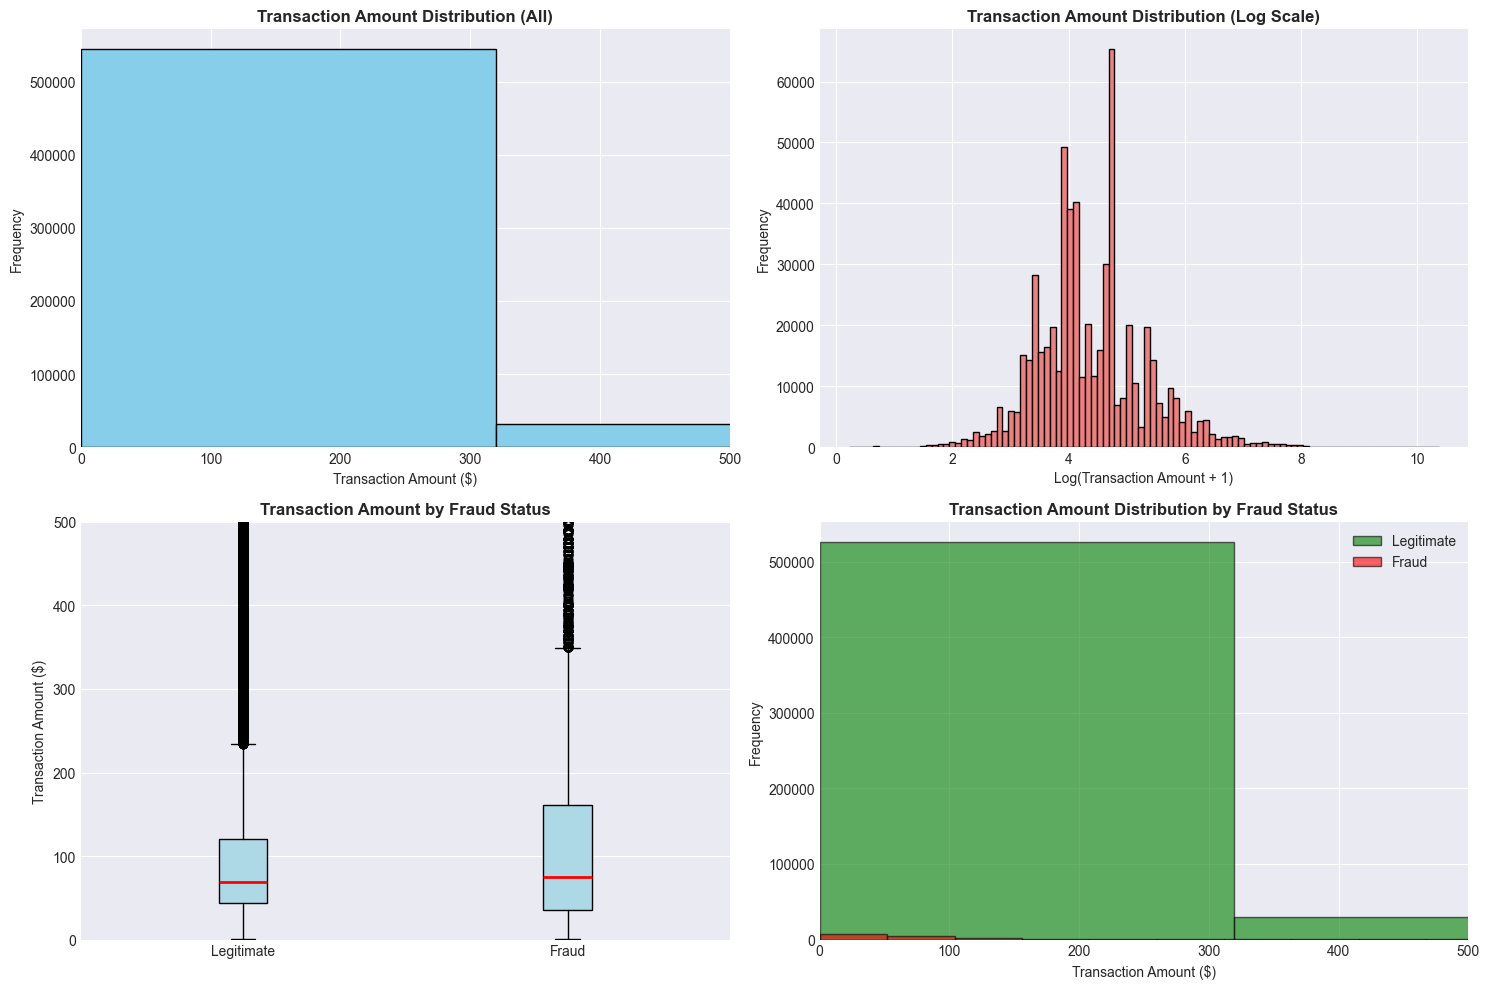

In [9]:
# Analyze transaction amounts
print("="*60)
print("TRANSACTION AMOUNT ANALYSIS")
print("="*60)

print("\nOverall statistics:")
print(train_transaction['TransactionAmt'].describe())

print("\nBy fraud status:")
print(train_transaction.groupby('isFraud')['TransactionAmt'].describe())

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribution of all transactions
ax1 = axes[0, 0]
train_transaction['TransactionAmt'].hist(bins=100, ax=ax1, color='skyblue', edgecolor='black')
ax1.set_title('Transaction Amount Distribution (All)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Transaction Amount ($)', fontsize=10)
ax1.set_ylabel('Frequency', fontsize=10)
ax1.set_xlim(0, 500)  # Focus on main range

# Log scale distribution
ax2 = axes[0, 1]
train_transaction['TransactionAmt'].apply(np.log1p).hist(bins=100, ax=ax2, color='lightcoral', edgecolor='black')
ax2.set_title('Transaction Amount Distribution (Log Scale)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Log(Transaction Amount + 1)', fontsize=10)
ax2.set_ylabel('Frequency', fontsize=10)

# Box plot by fraud status
ax3 = axes[1, 0]
fraud_data = [train_transaction[train_transaction['isFraud'] == 0]['TransactionAmt'],
              train_transaction[train_transaction['isFraud'] == 1]['TransactionAmt']]
ax3.boxplot(fraud_data, labels=['Legitimate', 'Fraud'], patch_artist=True,
            boxprops=dict(facecolor='lightblue'),
            medianprops=dict(color='red', linewidth=2))
ax3.set_title('Transaction Amount by Fraud Status', fontsize=12, fontweight='bold')
ax3.set_ylabel('Transaction Amount ($)', fontsize=10)
ax3.set_ylim(0, 500)

# Comparison histogram
ax4 = axes[1, 1]
train_transaction[train_transaction['isFraud'] == 0]['TransactionAmt'].hist(
    bins=100, ax=ax4, alpha=0.6, label='Legitimate', color='green', edgecolor='black')
train_transaction[train_transaction['isFraud'] == 1]['TransactionAmt'].hist(
    bins=100, ax=ax4, alpha=0.6, label='Fraud', color='red', edgecolor='black')
ax4.set_title('Transaction Amount Distribution by Fraud Status', fontsize=12, fontweight='bold')
ax4.set_xlabel('Transaction Amount ($)', fontsize=10)
ax4.set_ylabel('Frequency', fontsize=10)
ax4.set_xlim(0, 500)
ax4.legend()

plt.tight_layout()
plt.show()

## 8. Column Type Categorization

In [10]:
# Categorize columns by prefix
print("="*60)
print("COLUMN CATEGORIZATION BY PREFIX")
print("="*60)

def categorize_columns(df):
    categories = {
        'V_columns': [col for col in df.columns if col.startswith('V')],
        'C_columns': [col for col in df.columns if col.startswith('C')],
        'D_columns': [col for col in df.columns if col.startswith('D')],
        'M_columns': [col for col in df.columns if col.startswith('M')],
        'card_columns': [col for col in df.columns if col.startswith('card')],
        'addr_columns': [col for col in df.columns if col.startswith('addr')],
        'dist_columns': [col for col in df.columns if col.startswith('dist')],
        'id_columns': [col for col in df.columns if col.startswith('id')],
        'device_columns': [col for col in df.columns if 'device' in col.lower()],
        'other_columns': []
    }
    
    # Find other columns
    all_categorized = [col for cat_list in categories.values() for col in cat_list]
    categories['other_columns'] = [col for col in df.columns if col not in all_categorized]
    
    return categories

train_trans_cats = categorize_columns(train_transaction)
train_ident_cats = categorize_columns(train_identity)

print("\nTrain Transaction:")
for cat, cols in train_trans_cats.items():
    if len(cols) > 0:
        print(f"  {cat}: {len(cols)} columns")

print("\nTrain Identity:")
for cat, cols in train_ident_cats.items():
    if len(cols) > 0:
        print(f"  {cat}: {len(cols)} columns")

COLUMN CATEGORIZATION BY PREFIX

Train Transaction:
  V_columns: 339 columns
  C_columns: 14 columns
  D_columns: 15 columns
  M_columns: 9 columns
  card_columns: 6 columns
  addr_columns: 2 columns
  dist_columns: 2 columns
  other_columns: 7 columns

Train Identity:
  D_columns: 2 columns
  id_columns: 38 columns
  device_columns: 2 columns
  other_columns: 1 columns


## 9. Identity Data Overview

In [11]:
# Examine identity data
print("="*60)
print("IDENTITY DATA OVERVIEW")
print("="*60)

print(f"\nShape: {train_identity.shape}")
print(f"\nFirst few columns:")
print(train_identity.head())

print("\nBasic statistics for numeric columns:")
print(train_identity.describe())

IDENTITY DATA OVERVIEW

Shape: (144233, 41)

First few columns:
   TransactionID  id_01     id_02  id_03  id_04  id_05  id_06  id_07  id_08  \
0        2987004    0.0   70787.0    NaN    NaN    NaN    NaN    NaN    NaN   
1        2987008   -5.0   98945.0    NaN    NaN    0.0   -5.0    NaN    NaN   
2        2987010   -5.0  191631.0    0.0    0.0    0.0    0.0    NaN    NaN   
3        2987011   -5.0  221832.0    NaN    NaN    0.0   -6.0    NaN    NaN   
4        2987016    0.0    7460.0    0.0    0.0    1.0    0.0    NaN    NaN   

   id_09  id_10  id_11     id_12  id_13  id_14  id_15     id_16  id_17  id_18  \
0    NaN    NaN  100.0  NotFound    NaN -480.0    New  NotFound  166.0    NaN   
1    NaN    NaN  100.0  NotFound   49.0 -300.0    New  NotFound  166.0    NaN   
2    0.0    0.0  100.0  NotFound   52.0    NaN  Found     Found  121.0    NaN   
3    NaN    NaN  100.0  NotFound   52.0    NaN    New  NotFound  225.0    NaN   
4    0.0    0.0  100.0  NotFound    NaN -300.0  Found   

## 10. Key Findings Summary

In [12]:
# Summary of key findings
print("="*60)
print("KEY FINDINGS SUMMARY")
print("="*60)

print("\n📊 DATASET OVERVIEW:")
print(f"  • Training samples: {train_transaction.shape[0]:,}")
print(f"  • Test samples: {test_transaction.shape[0]:,}")
print(f"  • Total features: {train_transaction.shape[1] + train_identity.shape[1] - 1}")
print(f"    - Transaction features: {train_transaction.shape[1]}")
print(f"    - Identity features: {train_identity.shape[1]}")

print("\n⚠️  CLASS IMBALANCE:")
fraud_rate = train_transaction['isFraud'].mean() * 100
print(f"  • Fraud rate: {fraud_rate:.2f}%")
print(f"  • Imbalance ratio: 1:{(100-fraud_rate)/fraud_rate:.1f}")
print(f"  • This is a highly imbalanced problem!")

print("\n❓ MISSING DATA:")
print(f"  • Transaction columns with missing data: {len(train_trans_missing)} / {train_transaction.shape[1]}")
print(f"  • Identity columns with missing data: {len(train_ident_missing)} / {train_identity.shape[1]}")
print(f"  • Identity coverage: {train_identity.shape[0]/train_transaction.shape[0]*100:.1f}%")

print("\n💰 TRANSACTION AMOUNTS:")
print(f"  • Mean: ${train_transaction['TransactionAmt'].mean():.2f}")
print(f"  • Median: ${train_transaction['TransactionAmt'].median():.2f}")
print(f"  • Range: ${train_transaction['TransactionAmt'].min():.2f} - ${train_transaction['TransactionAmt'].max():.2f}")
print(f"  • Fraud mean: ${train_transaction[train_transaction['isFraud']==1]['TransactionAmt'].mean():.2f}")
print(f"  • Legitimate mean: ${train_transaction[train_transaction['isFraud']==0]['TransactionAmt'].mean():.2f}")

print("\n📂 FEATURE CATEGORIES:")
print(f"  • V columns (Vesta features): {len(train_trans_cats['V_columns'])}")
print(f"  • C columns (count features): {len(train_trans_cats['C_columns'])}")
print(f"  • D columns (time deltas): {len(train_trans_cats['D_columns'])}")
print(f"  • M columns (match features): {len(train_trans_cats['M_columns'])}")
print(f"  • Card features: {len(train_trans_cats['card_columns'])}")
print(f"  • Identity id columns: {len(train_ident_cats['id_columns'])}")

print("\n" + "="*60)
print("✓ MILESTONE 1 COMPLETED")
print("="*60)
print("\nNext steps:")
print("  1. Deep feature analysis (Milestone 2)")
print("  2. Temporal analysis (Milestone 3)")
print("  3. Build baseline model (Milestone 4-5)")

KEY FINDINGS SUMMARY

📊 DATASET OVERVIEW:
  • Training samples: 590,540
  • Test samples: 506,691
  • Total features: 434
    - Transaction features: 394
    - Identity features: 41

⚠️  CLASS IMBALANCE:
  • Fraud rate: 3.50%
  • Imbalance ratio: 1:27.6
  • This is a highly imbalanced problem!

❓ MISSING DATA:
  • Transaction columns with missing data: 374 / 394
  • Identity columns with missing data: 38 / 41
  • Identity coverage: 24.4%

💰 TRANSACTION AMOUNTS:
  • Mean: $135.03
  • Median: $68.77
  • Range: $0.25 - $31937.39
  • Fraud mean: $149.24
  • Legitimate mean: $134.51

📂 FEATURE CATEGORIES:
  • V columns (Vesta features): 339
  • C columns (count features): 14
  • D columns (time deltas): 15
  • M columns (match features): 9
  • Card features: 6
  • Identity id columns: 38

✓ MILESTONE 1 COMPLETED

Next steps:
  1. Deep feature analysis (Milestone 2)
  2. Temporal analysis (Milestone 3)
  3. Build baseline model (Milestone 4-5)
  • Legitimate mean: $134.51

📂 FEATURE CATEGORI